<a href="https://colab.research.google.com/github/Blessing-Mvana-Nhlozi/Physics-Project/blob/main/Gas_Sensor_Conductivity_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams as rcP
import seaborn as sns
from math import e
from scipy.interpolate import interp1d
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [ ]:
# exp_data_pd is the experimental data in pandas data frame
df=pd.read_csv('Gas Sensors Experimental Data Blessing.csv',sep=';')

# creating a function that will simulate the relative conductivity 
t=np.linspace(0,12.5,100)
def f(x,y):
    b=df.Time
    a=e**(y*b)
    return x*(1-a)

#the simulation of the relative change in conductivity
NO2=f(-0.00117,-0.79159)+0.0028
HCHO=f(0.000481262,-1.55827)+0.0028
MIXED=f(-0.00117,-0.79159)+f(0.000481262,-1.55827)+0.0028

# Pandas DataFrame from a dictionary:
dic={'period':df.Time,
     '$HCHO$ Exp Data Points':df.HCHO.to_list(),
     '$HCHO$ Simulation':HCHO,
     '$NO_2$ Exp Data Points':df.NO2.to_list(),
     '$NO_2$ Simulation':NO2,
     'Mixture Exp Data Points':df.MIXTURE.to_list(),
     'Mixture Simulation':MIXED}
df2=pd.DataFrame(dic)
df2

,period,$HCHO$ Exp Data Points,$HCHO$ Simulation,$NO_2$ Exp Data Points,$NO_2$ Simulation,Mixture Exp Data Points,Mixture Simulation
0,0.0,0.00280,0.002800,0.002800,0.002800,0.002800,0.002800
1,0.1,0.00285,0.002869,0.002800,0.002711,0.002800,0.002780
2,0.2,0.00290,0.002929,0.002800,0.002629,0.002800,0.002758
3,0.5,0.00300,0.003060,0.002800,0.002418,0.002800,0.002678
4,0.7,0.00310,0.003120,0.002600,0.002302,0.002700,0.002622
5,0.9,0.00315,0.003163,0.002400,0.002204,0.002220,0.002567
6,1.0,0.00317,0.003180,0.002160,0.002160,0.002250,0.002540
7,1.2,0.00319,0.003207,0.002120,0.002083,0.002250,0.002490
8,1.4,0.00323,0.003227,0.001980,0.002016,0.002300,0.002443
9,2.0,0.00328,0.003260,0.001900,0.001870,0.002230,0.002330


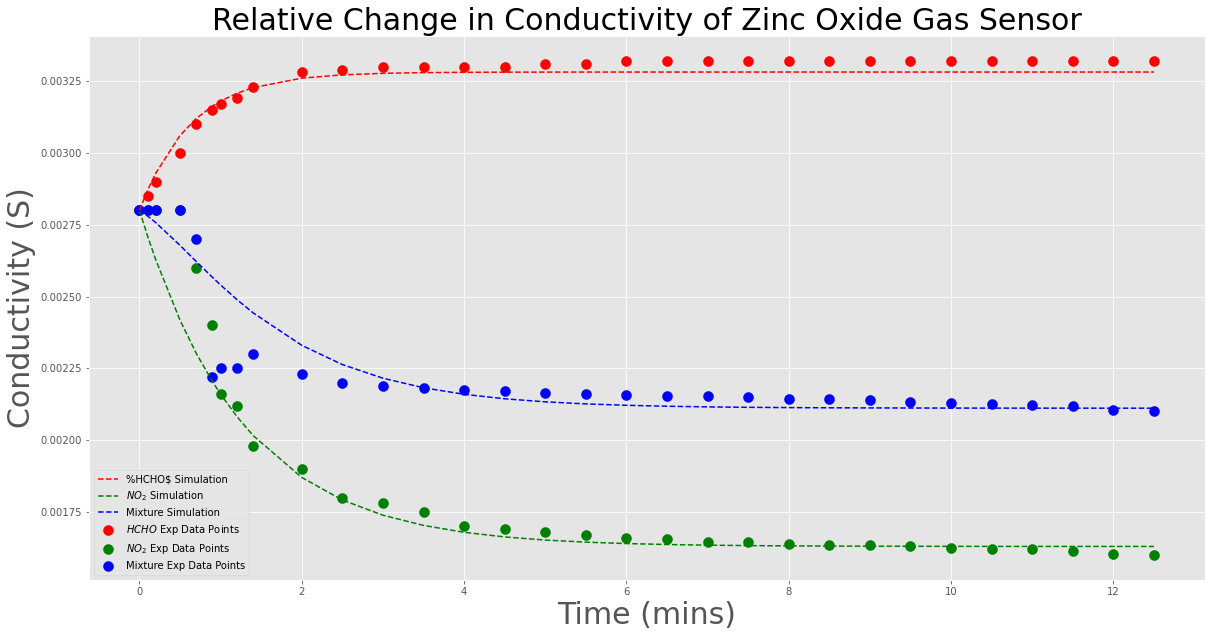

In [ ]:
style.use('ggplot')
rcP['figure.figsize']=20,10
plt.scatter(df.Time, df.HCHO, label='$HCHO$ Exp Data Points', alpha=1,color='red',s=100)
plt.plot(df.Time, HCHO, 'r--',label='%HCHO$ Simulation')

plt.scatter(df.Time, df.NO2, label='$NO_2$ Exp Data Points', alpha=1,color='green',s=100)
plt.plot(df.Time, NO2,'g--', label='$NO_2$ Simulation')

plt.scatter(df.Time, df.MIXTURE, label='Mixture Exp Data Points', alpha=1,color='blue',s=100)
plt.plot(df.Time, MIXED,'b--', label='Mixture Simulation')

plt.xlabel('Time (mins)', {'size': 30})
plt.ylabel('Conductivity (S)', {'size': 30})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 30})
plt.legend();

In [ ]:
f1 = interp1d(df.Time, df.HCHO, kind='cubic')
f2 = interp1d(df.Time, df.NO2, kind='cubic')
f3 = interp1d(df.Time, df.MIXTURE, kind='cubic')
xnew = np.linspace(0, 12.5, num=126, endpoint=True)

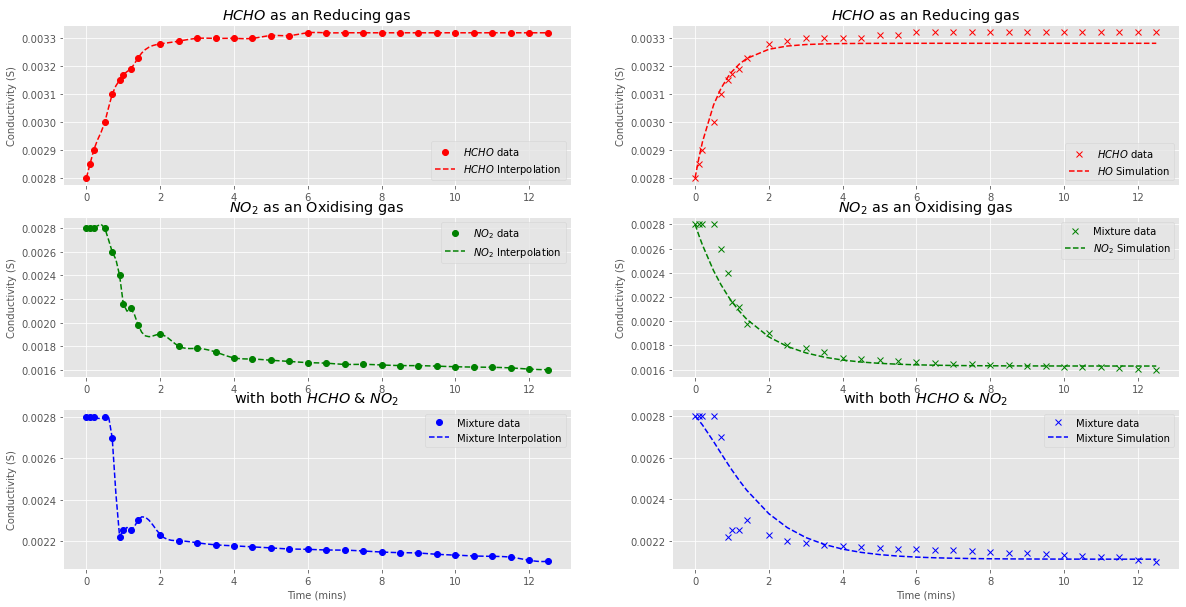

In [ ]:
plt.subplot(321)
plt.plot(df.Time,df.HCHO, 'ro', )
plt.plot(xnew, f1(xnew), 'r--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Interpolation'], loc='best')
plt.title('$HCHO$ as an Reducing gas')

plt.subplot(322)
plt.plot(df.Time, df.HCHO, 'rx')
plt.plot(df.Time, HCHO, 'r--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HO$ Simulation'], loc='best')
plt.title('$HCHO$ as an Reducing gas')

plt.subplot(323)
plt.plot(df.Time, df.NO2, 'go')
plt.plot(xnew, f2(xnew), 'g--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Interpolation'], loc='best')
plt.title('$NO_2$ as an Oxidising gas')

plt.subplot(324)
plt.plot(df.Time, df.NO2,'gx')
plt.plot(df.Time, NO2,'g--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', '$NO_2$ Simulation'], loc='best')
plt.title('$NO_2$ as an Oxidising gas')

plt.subplot(325)
plt.plot(df.Time, df.MIXTURE, 'bo')
plt.plot(xnew, f3(xnew), 'b--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Interpolation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

plt.subplot(326)
plt.plot(df.Time, df.MIXTURE, 'bx')
plt.plot(df.Time, MIXED,'b--')
plt.xlabel('Time (mins)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')


plt.show()

Therefore, the relative change in the electrical conductivity becomes
Rt G t
k
i i
i
i
k t
i i
I i
σ λ λ ( ) –
˜
– ~ – ˜
= +
⎛
⎝
⎜
⎜
⎞
⎠
⎟
⎟( ) ⎧
⎨
⎪
⎩
⎪
⎫
⎬
⎪
⎭
⎪ =
∑ 1 1e . (31)
The relative change in the electrical conductivity of the sensor in the flowing gas, eq.
(31), is composed of two kinds of terms: a linear term in time, which we have already seen
in Fig. 2, and the exponentially saturating term. Removing the linear term in time using the
trend-second differentiation with respect to t, and other methods, we have an exponentially
saturating or decaying term with an amplitude that is proportional to the surface density of
gas:
Rt G
k i
i i
I i
i
k ti
σ
λ () – – ~
~
– ˜
→ ⎛
⎝
⎜
⎞
⎠
⎟( ) =
∑ 1 1e 